# 🥔 Potato Disease Detection - Week 1: Image Processing with OpenCV

In [1]:
# ✅ Setup and Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

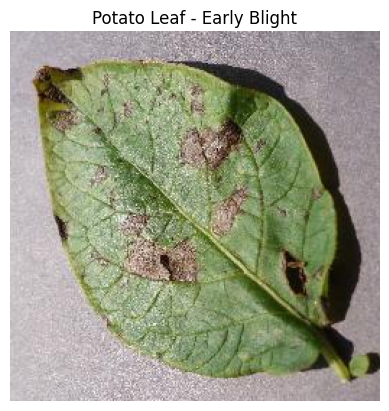

In [2]:
# ✅ Load and Display an Image
# Load image using OpenCV
image_path = "dataset/Potato___Early_blight/0a8a68ee-f587-4dea-beec-79d02e7d3fa4___RS_Early.B 8461.jpg"  # update with your path
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display image
plt.imshow(img_rgb)
plt.title("Potato Leaf - Early Blight")
plt.axis('off')
plt.show()

In [ ]:
# ✅ Resize and Normalize Image
# Resize
img_resized = cv2.resize(img_rgb, (224, 224))

# Normalize pixel values to [0, 1]
img_normalized = img_resized / 255.0

plt.imshow(img_normalized)
plt.title("Resized and Normalized")
plt.axis('off')
plt.show()

In [ ]:
# ✅ Image Augmentation (with Albumentations)
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Define augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=30, p=0.5),
    A.RandomCrop(width=200, height=200, p=0.5),
    A.Resize(224, 224),
])

# Apply transform
augmented = transform(image=img_rgb)
aug_img = augmented['image']

plt.imshow(aug_img)
plt.title("Augmented Image")
plt.axis('off')
plt.show()

In [ ]:
# ✅ Optional: Loop through Dataset and Visualize
import glob

folder = "dataset/Potato___Healthy"  # example folder

image_files = glob.glob(os.path.join(folder, "*.jpg"))[:5]

for img_path in image_files:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    plt.imshow(img)
    plt.title(f"Sample: {os.path.basename(img_path)}")
    plt.axis("off")
    plt.show()